# L'objectif est de calculer, pour chaque décile de revenu, la part de leur revenu que les ménages dépensent en taxes indirectes. On utilise plusieurs définitions du revenu pour comparer la régressivité de ces taxes. On compare également l'importance de chacune de ces taxes dans l'ensemble de l'imposition indirecte.

In [1]:
import pandas
import seaborn

from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_bar
from openfisca_france_indirect_taxation.surveys import SurveyScenario

seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Sélection des variables pour la simulation

In [2]:
simulated_variables = [
    'tva_total',
    'ticpe_totale',
    'vin_droit_d_accise',
    'biere_droit_d_accise',
    'alcools_forts_droit_d_accise',
    'cigarette_droit_d_accise',
    'cigares_droit_d_accise',
    'tabac_a_rouler_droit_d_accise',
    'assurance_transport_taxe',
    'assurance_sante_taxe',
    'autres_assurances_taxe',
    'revtot',
    'rev_disponible',
    'depenses_tot',
    'taxes_indirectes_total'
    ]


# Calcul des contributions des ménages aux différentes taxes indirectes, par décile de revenu

Contributions aux différentes taxes indirectes en part de revenu total, par décile de revenu en 2000


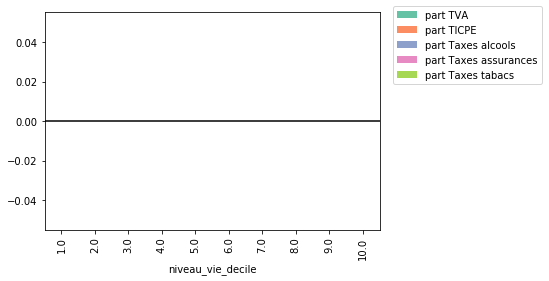

Contributions aux différentes taxes indirectes en part de revenu disponible, par décile de revenu en 2000


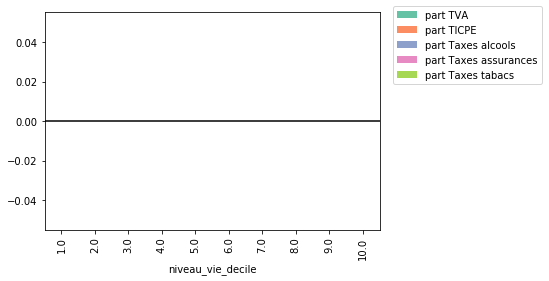

Contributions aux différentes taxes indirectes en part de depenses totales, par décile de revenu en 2000


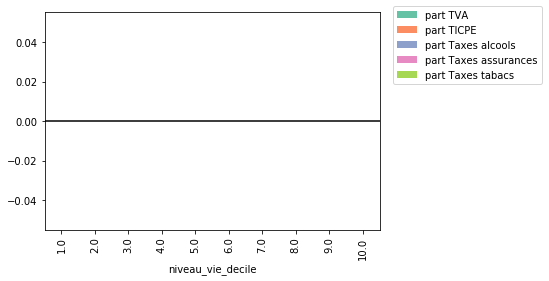

Contributions aux différentes taxes indirectes en part de toutes les taxes indirectes, par décile de revenu en 2000


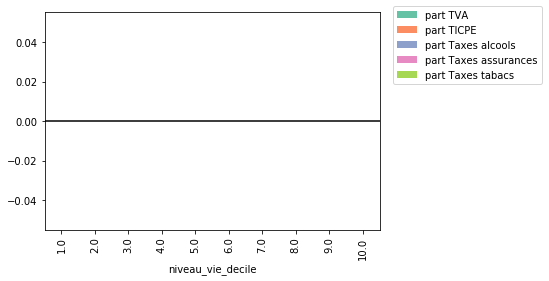

Contributions aux différentes taxes indirectes en part de revenu total, par décile de revenu en 2005


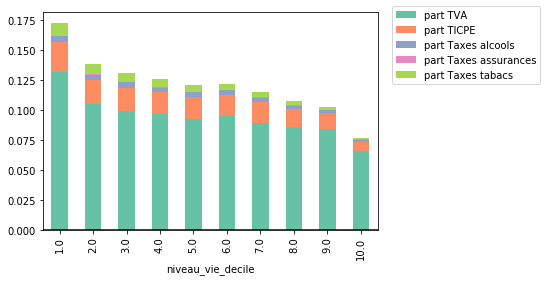

Contributions aux différentes taxes indirectes en part de revenu disponible, par décile de revenu en 2005


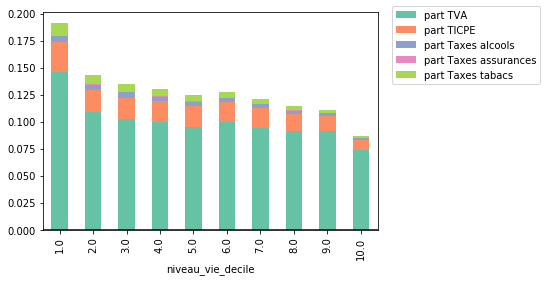

Contributions aux différentes taxes indirectes en part de depenses totales, par décile de revenu en 2005


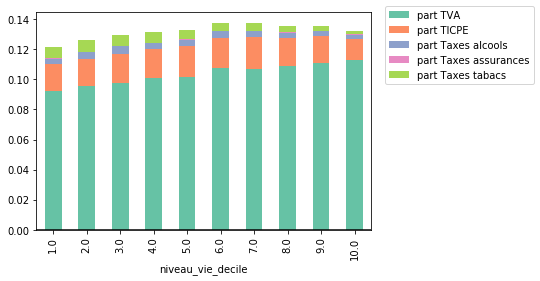

Contributions aux différentes taxes indirectes en part de toutes les taxes indirectes, par décile de revenu en 2005


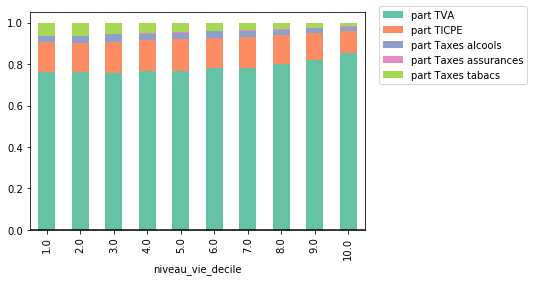

Contributions aux différentes taxes indirectes en part de revenu total, par décile de revenu en 2011


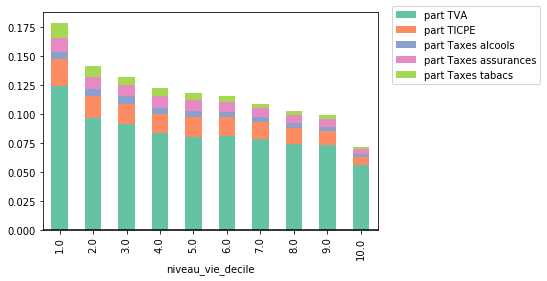

Contributions aux différentes taxes indirectes en part de revenu disponible, par décile de revenu en 2011


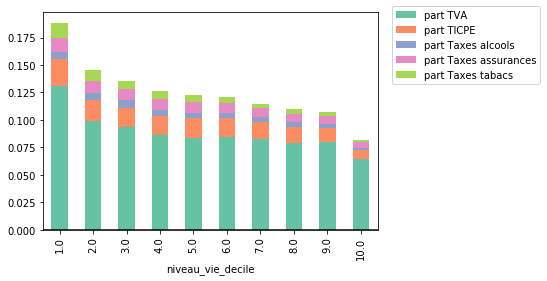

Contributions aux différentes taxes indirectes en part de depenses totales, par décile de revenu en 2011


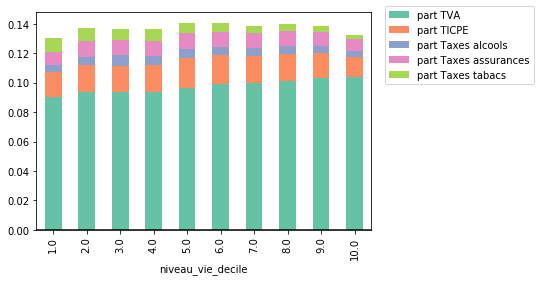

Contributions aux différentes taxes indirectes en part de toutes les taxes indirectes, par décile de revenu en 2011


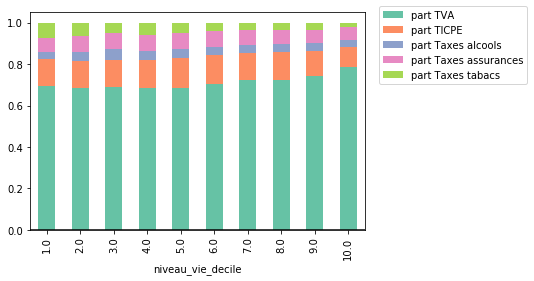

In [4]:
for year in [2000, 2005, 2011]:
    survey_scenario = SurveyScenario.create(year = year)
    pivot_table = pandas.DataFrame()
    for values in simulated_variables:
        pivot_table = pandas.concat([
            pivot_table,
            survey_scenario.compute_pivot_table(
                values = [values], columns = ['niveau_vie_decile'], period = year
                )
            ])
    taxe_indirectes = pivot_table.T

    taxe_indirectes['TVA'] = taxe_indirectes['tva_total']
    taxe_indirectes['TICPE'] = taxe_indirectes['ticpe_totale']
    taxe_indirectes[u'Taxes alcools'] = (
        taxe_indirectes['vin_droit_d_accise'] +
        taxe_indirectes['biere_droit_d_accise'] +
        taxe_indirectes['alcools_forts_droit_d_accise']
        )
    taxe_indirectes[u'Taxes assurances'] = (
        taxe_indirectes['assurance_sante_taxe'] +
        taxe_indirectes['assurance_transport_taxe'] +
        taxe_indirectes['autres_assurances_taxe']
        )
    taxe_indirectes[u'Taxes tabacs'] = (
        taxe_indirectes['cigarette_droit_d_accise'] +
        taxe_indirectes['cigares_droit_d_accise'] +
        taxe_indirectes['tabac_a_rouler_droit_d_accise']
        )

    taxe_indirectes = taxe_indirectes.rename(columns = {
        'revtot': 'revenu total',
        'rev_disponible': 'revenu disponible', 
        'depenses_tot': 'depenses totales',
        'taxes_indirectes_total': 'toutes les taxes indirectes'
        })
    for revenu in ['revenu total', 'revenu disponible', 'depenses totales', 'toutes les taxes indirectes']:
        list_part_taxes = []
        for taxe in ['TVA', 'TICPE', 'Taxes alcools', 'Taxes assurances', 'Taxes tabacs']:
            taxe_indirectes[u'part ' + taxe] = (
                taxe_indirectes[taxe] / taxe_indirectes[revenu]
                )
            'list_part_taxes_{}'.format(taxe)
            list_part_taxes.append(u'part ' + taxe)

        df_to_graph = taxe_indirectes[list_part_taxes]

        print(
            "Contributions aux différentes taxes indirectes en part de {0}, par décile de revenu en {1}".format(
                revenu, year))
        graph_builder_bar(df_to_graph, stacked = True)
